In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
df = pd.read_csv('C:/users/orion.darley/desktop/CS230/btc_training.csv',index_col="Date",parse_dates=True)


# Data Prep

In [3]:
df.head()

,Price,Open,High,Low,Vol2,Change %
Date,,,,,,
2019-03-24,3994.7,4002.6,4005.7,3967.0,2040000,-0.20%
2019-03-23,4002.5,3990.4,4018.2,3980.8,2000000,0.30%
2019-03-22,3990.4,3982.2,4005.7,3971.8,2830000,0.21%
2019-03-21,3982.2,4041.2,4064.0,3923.8,3880000,-1.46%
2019-03-20,4041.2,4017.0,4050.0,3985.3,3180000,0.60%


In [14]:
df = df.drop(['Change %'], axis = 1)

In [15]:
df.isna().any()

Price    False
Open     False
High     False
Low      False
Vol2     False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2549 entries, 2019-03-24 to 2012-04-01
Data columns (total 6 columns):
Price       2549 non-null float64
Open        2549 non-null float64
High        2549 non-null float64
Low         2549 non-null float64
Vol2        2549 non-null int64
Change %    2549 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 139.4+ KB


# EDA

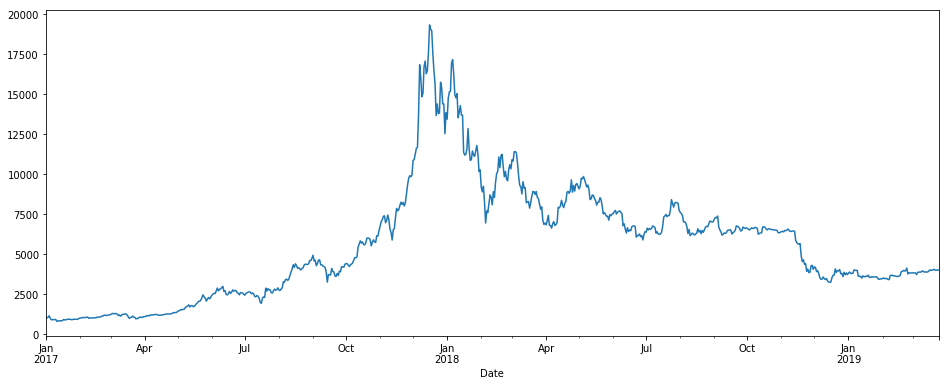

In [12]:
df['Price'].plot(figsize=(16,6))

In [11]:
# remove tail (where there is little predictive information)
df = df[(df.index >= '2017-01-01')]
print(df.tail())

             Price    Open    High     Low    Vol2 Change %
Date                                                       
2017-01-05   989.3  1135.4  1150.6   874.5  240010  -12.86%
2017-01-04  1135.4  1033.3  1148.5  1022.3  156270    9.88%
2017-01-03  1033.3  1017.0  1035.5  1006.5   54790    1.60%
2017-01-02  1017.0   995.4  1031.7   990.2   64950    2.17%
2017-01-01   995.4   963.4  1001.6   956.1   41150    3.33%


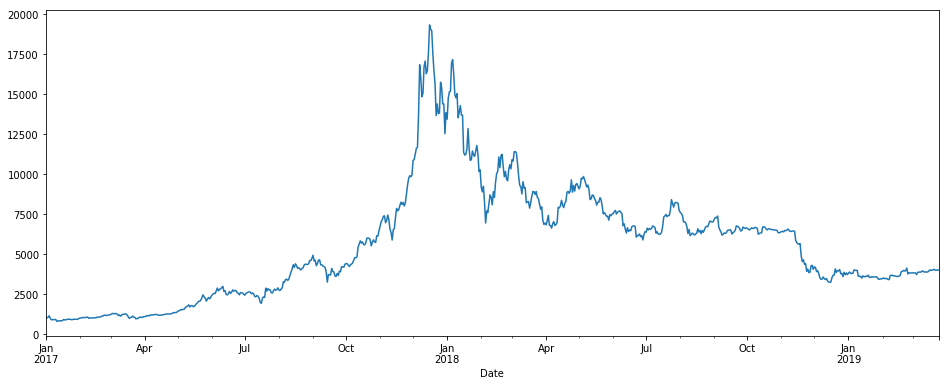

In [13]:
df['Price'].plot(figsize=(16,6))

In [16]:
# 7 day rolling mean
df.rolling(7).mean().head(20)

,Price,Open,High,Low,Vol2
Date,,,,,
2019-03-24,NaN,NaN,NaN,NaN,NaN
2019-03-23,NaN,NaN,NaN,NaN,NaN
2019-03-22,NaN,NaN,NaN,NaN,NaN
2019-03-21,NaN,NaN,NaN,NaN,NaN
2019-03-20,NaN,NaN,NaN,NaN,NaN
2019-03-19,NaN,NaN,NaN,NaN,NaN
2019-03-18,4002.600000,4000.728571,4029.400000,3965.657143,2.791429e+06
2019-03-17,4000.714286,4001.271429,4029.985714,3964.128571,2.767143e+06
2019-03-16,4001.271429,3991.842857,4034.614286,3955.971429,2.975714e+06


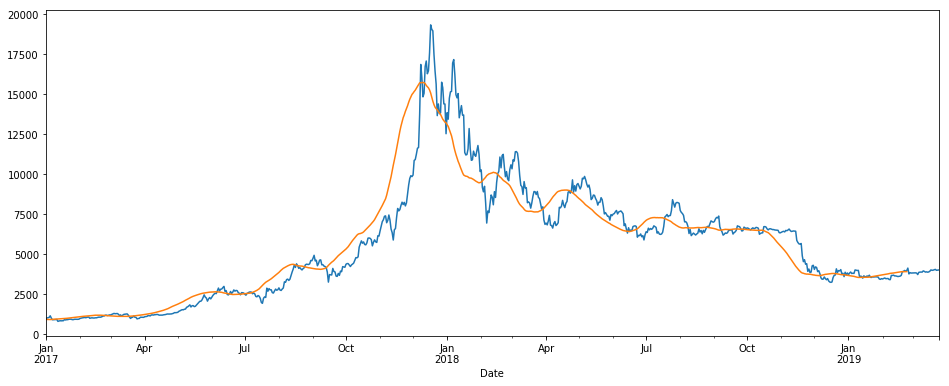

In [18]:
#Compare Open to smoothed average Close or "Price"
df['Open'].plot(figsize=(16,6))
df.rolling(window=30).mean()['Price'].plot()

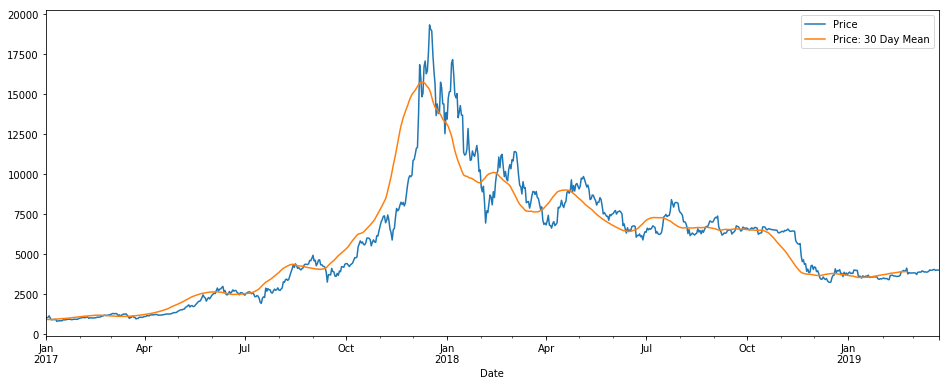

In [20]:
#Compare Price to smoothed ave 30 day Price
df['Price: 30 Day Mean'] = df['Price'].rolling(window=30).mean()
df[['Price','Price: 30 Day Mean']].plot(figsize=(16,6))

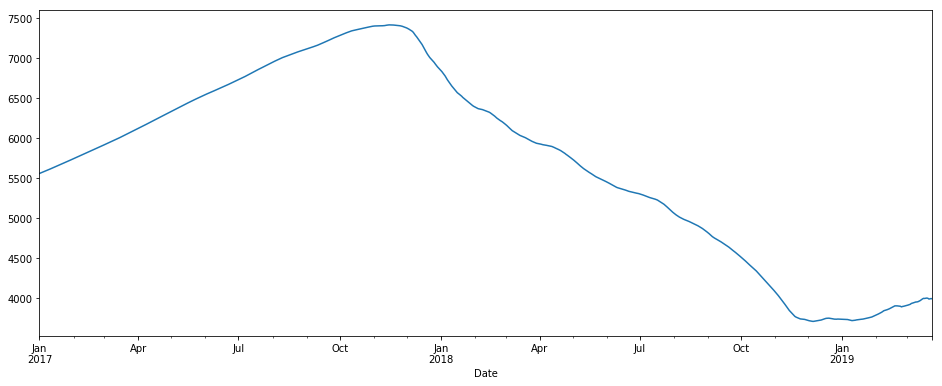

In [21]:
#Specify a minimum number of periods
df['Price'].expanding(min_periods=1).mean().plot(figsize=(16,6))

# Building Training Dataset, Scale, and Structure

In [24]:
training_set=df['Price']
training_set=pd.DataFrame(training_set)

In [25]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [28]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 813):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Building the RNN

In [29]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [30]:
# Initialising the RNN
regressor = Sequential()

In [31]:
# Adding the first LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [32]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
753/753 [==============================] - 21s 29ms/step - loss: 0.0326
Epoch 2/50
753/753 [==============================] - 10s 14ms/step - loss: 0.0090
Epoch 3/50
753/753 [==============================] - 9s 11ms/step - loss: 0.0057
Epoch 4/50
753/753 [==============================] - 8s 11ms/step - loss: 0.0052
Epoch 5/50
753/753 [==============================] - 10s 13ms/step - loss: 0.0051
Epoch 6/50
753/753 [==============================] - 10s 14ms/step - loss: 0.0037
Epoch 7/50
753/753 [==============================] - 9s 12ms/step - loss: 0.0044
Epoch 8/50
753/753 [==============================] - 10s 13ms/step - loss: 0.0051
Epoch 9/50
753/753 [==============================] - 10s 13ms/step - loss: 0.0040
Epoch 10/50
753/753 [==============================] - 11s 14ms/step - loss: 0.0050
Epoch 11/50
753/753 [==============================] - 10s 13ms/step - loss: 0.0040
Epoch 12/50
753/753 [===================

# Making the predictions and visualising the results

In [47]:
#Retrieving the btc price up to April
df_test = pd.read_csv('C:/users/orion.darley/desktop/CS230/btc_test.csv',index_col="Date",parse_dates=True)

In [48]:
actual_btc_price = df_test.iloc[:, 1:2].values

In [49]:
df_test.head()

,Price,Open,High,Low,Vol2,Change %
Date,,,,,,
2019-04-14,5134.8,5052.0,5153.5,5010.7,566380,1.64%
2019-04-13,5051.8,5054.2,5093.4,5011.6,577160,-0.05%
2019-04-12,5054.2,5022.7,5080.5,4889.2,779140,0.63%
2019-04-11,5022.6,5307.7,5337.0,4948.0,943490,-5.37%
2019-04-10,5307.8,5158.4,5404.1,5142.9,837510,2.89%


In [50]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2019-04-14 to 2019-03-25
Data columns (total 6 columns):
Price       21 non-null float64
Open        21 non-null float64
High        21 non-null float64
Low         21 non-null float64
Vol2        21 non-null int64
Change %    21 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 1.1+ KB


In [51]:
test_set=df_test['Price']
test_set=pd.DataFrame(test_set)

In [52]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2019-04-14 to 2019-03-25
Data columns (total 1 columns):
Price    21 non-null float64
dtypes: float64(1)
memory usage: 336.0 bytes


In [53]:
# Getting the predicted stock price of 2017
df_total = pd.concat((df['Price'], df_test['Price']), axis = 0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [56]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()
print(predicted_stock_price.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
0    20 non-null float32
dtypes: float32(1)
memory usage: 160.0 bytes
             0
0   992.149475
1  1164.086182
2  1577.968750
3  2220.496582
4  2990.102539


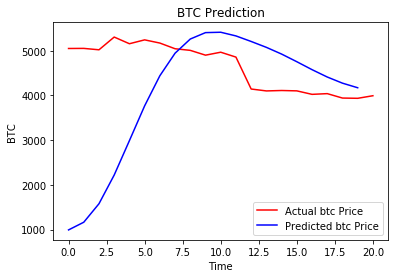

In [55]:
# Visualising the results
plt.plot(actual_btc_price, color = 'red', label = 'Actual btc Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted btc Price')
plt.title('BTC Prediction')
plt.xlabel('Time')
plt.ylabel('BTC')
plt.legend()
plt.show()